# **Building a Linear Regression Model from Scratch**

## **Overview**

For most data science projects, you would expect to see **sklearn** scattered throughout the code and notebook. This is because sklearn is the industry standard library which offers many tools for both supervised and unsupervised learning projects. I myself have experience with **sklearn**, using it in the past for models ranging from **ridge regression models** to **random forest classification models**. However, despite it's evident value, there is a danger with using **sklearn** that you do not understand the mathematical fundamentals which make the model learn, instead entering your data into the *infamous black box*, and taking the output at face value. *This project was formulated with exactly this in mind*. Within this notebook, rather than using **sklearn's** built in **Linear Regression** model, we will construct our very own, *step by step*, getting an inside look at the mathematics that powers machine learning algorithms.

The chosen dataset for this project is Kaggle's **'Student Performance (Multiple Linear Regression)'** dataset, provided by **Nikhil Narayan**. This dataset consists of 10,000 student records, with each record containing various indicators of student performance. Of these indicators, our **target variable** is titled **'Performance Index'**, which measures the overall performance of each student between 0 - 100. Within this project, we will use our **5 remaining features** to build a **linear regression model** that can accurately predict the **Performance Index** for each student.

## **Environment & Library Setup**

To start this project, I activated **Jupyter Notebooks** locally, ensuring that my work remains stored in a *repeatable* and *easy-to-find* location. Next, I imported the **core python stack**, including **pandas** for data manipulation, **NumPy** for numerical operations, and **matplotlib/seaborn** for data visualisation. Notably being removed from a traditional data science stack is **scikit-learn**. This is because the purpose of this project is to create the linear regression manually - *though note that sklearn will be added later for the model comparison*. Lastly, I have applied **Seaborn** as my default theme so that the **matplotlib** figures which I use within this notebook will be *readable without additional styling code*.

In [1]:
# Jupyter setup commands
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import our third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Applying Seaborn's default theme within the notebook
sns.set()

## **Loading the Dataset**

Within this section I will load my dataset named **'Student_Performance.csv'** and explore its features and ensure that it everything is as expected before moving on with the project.

In [4]:
# Assign our dataset to the variable 'data'
data = pd.read_csv('Student_Performance.csv')

In [5]:
# View the features that define our dataset, identifying Performance Index as our target
data.keys()

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
# Check to see if we have any null entries we must clean, and the data types of our features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
# Display of the first 5 rows of our dataset with column titles
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Within this section of the project, we have created a *great overview of the dataset*, preparing ourselves for the next steps of **feature manipulation**, **exploratory analyses**, and finally **creating the model**. By calling **data.keys()**, we identify the features of our dataset - importantly seeing our target variable **'Performance Index'**, and those which we will use to predict it's value. Next, by calling **data.head()**, we confirm that we have **0 null values**, meaning we won't have to drop or estimate any data before modeling. This step also importantly reveals that one of our features, **'Extracurricular Activities'** is of type **object**, something we will have to rectify before moving any further. Lastly, we call **data.head()**, to see the first 5 rows of our dataset. The outputted table is as was expected given are previous steps, with the only glaring aspect needing improving being the **numerification** of our feature **'Extracurricular Activities'**, something we will tackle shortly.

## **Convert our Non-Numeric Feature Values**

Whilst we have identified that our dataset has no null values, using **data.info()**, we have identified that one of our features - **'Extracurricular Activities'** - is not numerically classified, with each entry instead being assigned either a **'Yes'** or **'No'**. As previously mentioned, in order to use this feature within our linear regression model, we must first represent it numerically. This is what we will do in this step of the project, with a process called **label encoding**, which will map our two values of **'Yes'** and **'No'**, onto **1** and **0** respectively.

In [8]:
# Mapping our 'Extracurricular Activities' feature into numerical terms
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

/var/folders/h2/dtsbllj50jdgt07sh1sztdxc0000gn/T/ipykernel_17669/1266546733.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [9]:
# Another look at our dataset reveals that 'Extracurricular Activities' is now represented by 1s and 0s
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## **Exploratory Data Analysis**

Before we move onto creating our model, we are going to first **visualise** our data to see if there are any underlying trends we can reveal that will likely become integral to our modeling process. We start the section with a **simple statistical summary** of the dataset, before moving onto plotting both **univariate** and **bivariate** trends in the data. Within the **univariate analysis**, we will observe the distribution of each feature and predict what these trends will suggest for our modeling capabilities. Our **bivariate analysis** will expand upon this to reveal *how our features interact*, and importantly the impact of these interactions on the **target variable**. The section will finally be concluded with a short summary that encapsulates our findings, and lays the ground for the **modeling** around which this project is centred.

In [10]:
# Provide a statistical summary of our data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000.0,0.4948,0.499998,0.0,0.0,0.0,1.0,1.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


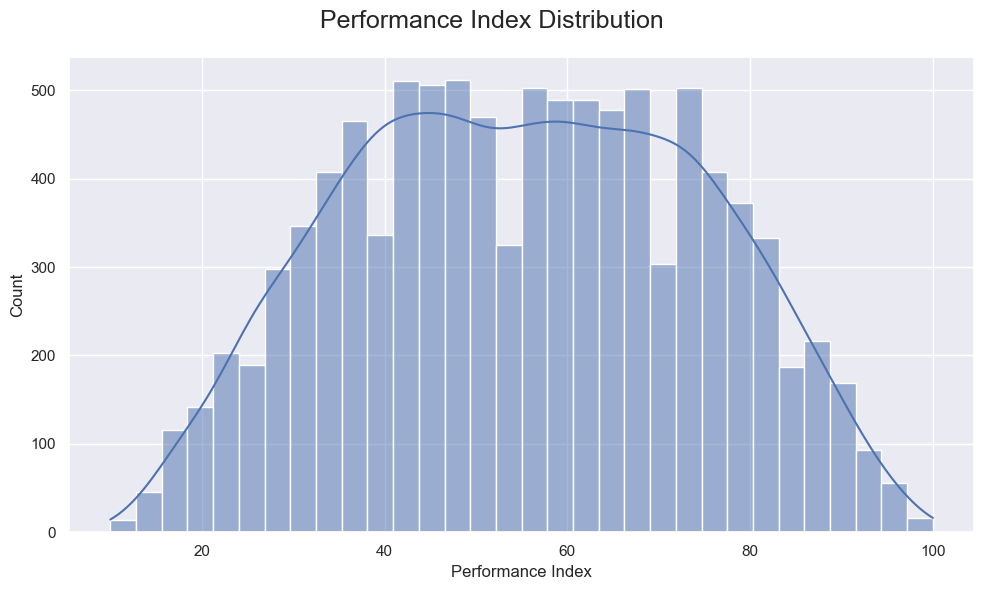

In [11]:
# Create a simple histogram which plots the distribution of our target variable
plt.figure(figsize=(10, 6))
sns.histplot(x='Performance Index', kde=True, data=data)
plt.suptitle('Performance Index Distribution', fontsize=18)
plt.tight_layout()
plt.show()

In the above figure is a **histogram** plot which illustrates the distribution of our **target variable**. The histogram reveals that **Performance Index** scores roughly represent a **Gaussian bell curve**, with a peak in the middle and two tails on either end. This is a significant observation because it lends itself well to having normally distributed errors for our model, likely being symmetrical around the mean, which ensures that the statistical tests used to validate the model are *more reliable*, giving us *greater confidence* in the significance of our findings.

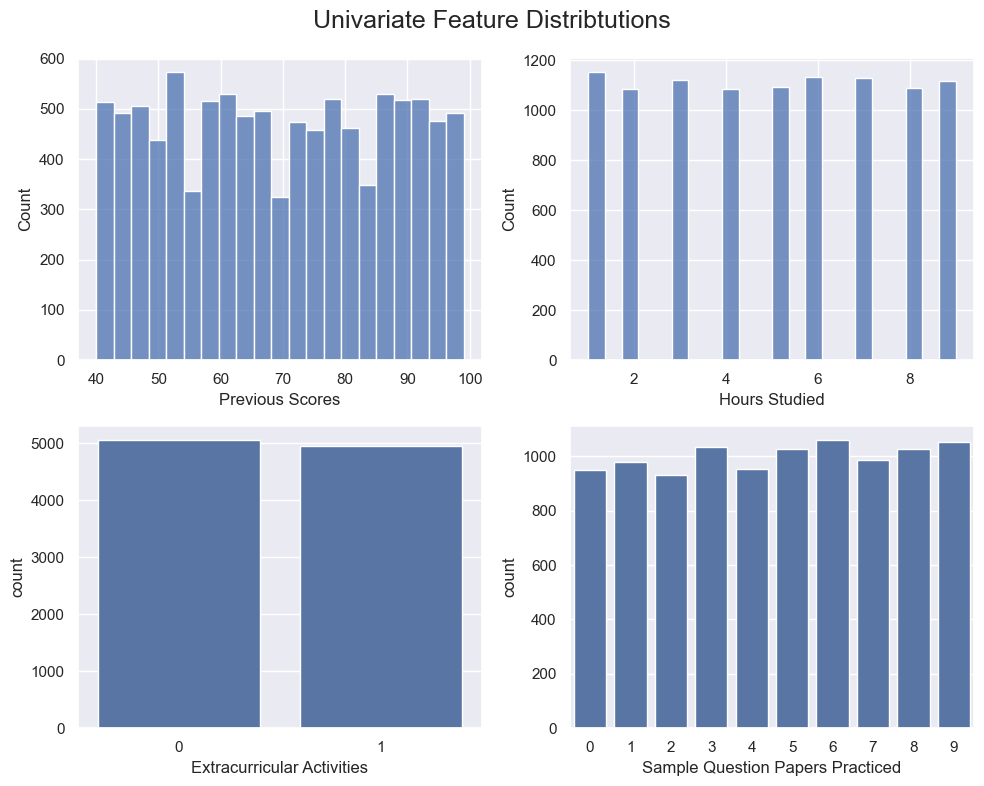

In [12]:
# Creates a 2x2 grid in which we can plot our remaining univariate features
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()

# Creates a histogram and countplots to plot the distributions of our remaining features
sns.histplot(data['Previous Scores'], ax=axes[0])
sns.histplot(x='Hours Studied', data=data, ax=axes[1])
sns.countplot(x='Extracurricular Activities', data=data, ax=axes[2])
sns.countplot(x='Sample Question Papers Practiced', data=data, ax=axes[3])

# Creates a title and layout for our graphs
plt.suptitle('Univariate Feature Distribtutions', fontsize=18)
plt.tight_layout()
plt.show()

From our univariate analysis on our non-target features, we can see that our graphs are all **relatively uniformly distributed**, particularly the features **'Hours Studied'** and **'Extracurricular Activities'**. This uniform distribution will *allow for our model to better generalise* as our model's training data will be *more evenly spread*, exposing our model to an equal and wide range of sample values. The consequence of this will be a more robust and reliable model, leading to improved predictive powers. 

/var/folders/h2/dtsbllj50jdgt07sh1sztdxc0000gn/T/ipykernel_17669/4110368574.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 2 Axes> than <Figure size 1000x800 with 4 Axes> which fig.colorbar is called on.
  colour_bar = fig.colorbar(previous_scores, cmap='Blues', label='Count')


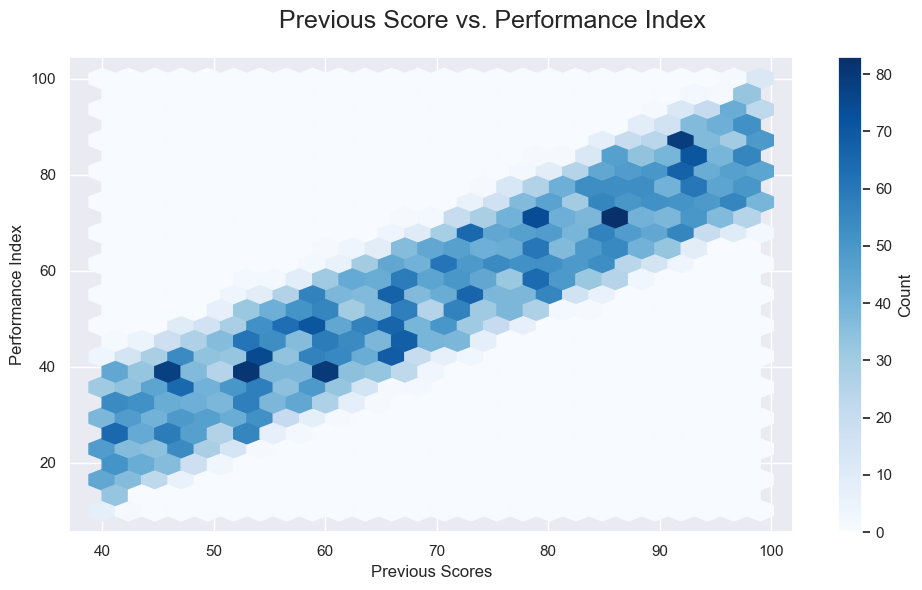

In [13]:
# Create a hexbin graph plotting previous scores and performace index
plt.figure(figsize=(10, 6))
previous_scores = plt.hexbin(x='Previous Scores', y='Performance Index', gridsize=25, cmap='Blues', data=data)
colour_bar = fig.colorbar(previous_scores, cmap='Blues', label='Count')

# Format our graph
plt.suptitle('Previous Score vs. Performance Index', fontsize=18)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.tight_layout()
plt.show()

From this graph, we can determine that our feature **'Previous Scores'** has a strongly positive relationship with our target variable **'Performance Index'**, supported by the calculated Pearson correlation coefficient of 0.915. The darker shades of blue represent a *higher count of points* in our dataset within the confines of each hexagon. We witness a higher density towards the centre of our correlation, with few glaringly obvious outliers - though this is likely due to our system of shading underrepresenting sparsely populated regions. Overall, the findings of this graph suggest that our feature **'Previous Scores'** will be a powerful predictor for our target variable, something we will later be able to confirm by looking at our **trained model's weights**.

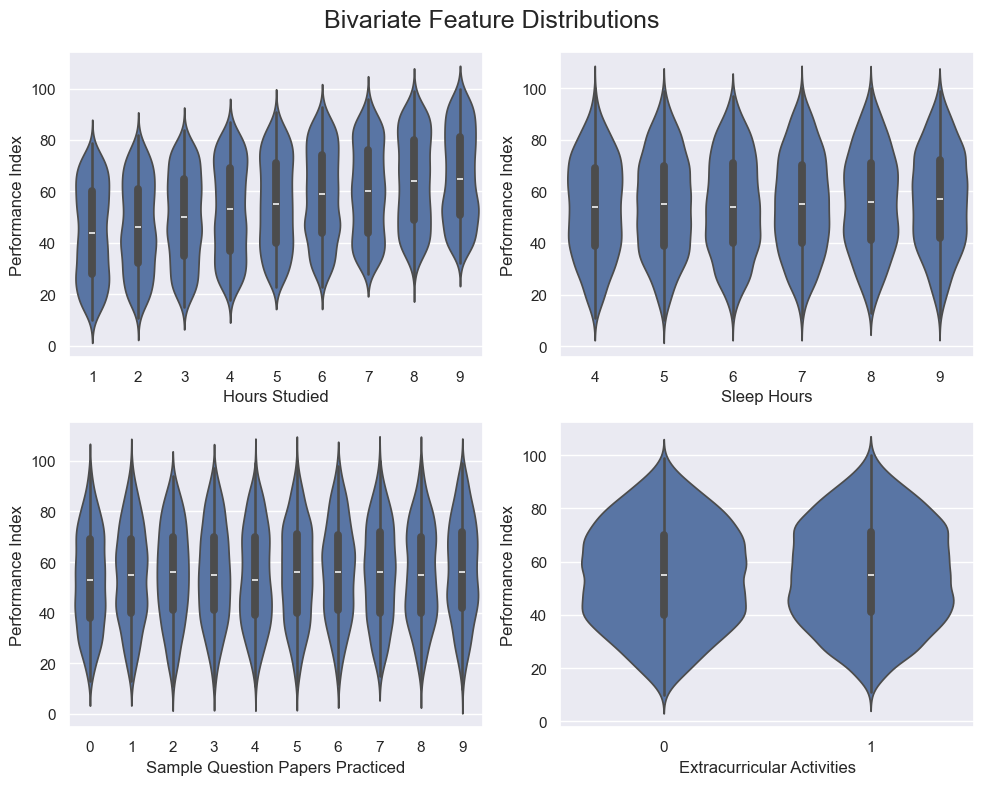

In [14]:
# Create a grid for our 4 violin plots
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()

# Create our violin plots to represent our bivariate relationships
sns.violinplot(data=data, x='Hours Studied', y='Performance Index', ax=axes[0])
sns.violinplot(data=data, x='Sleep Hours', y='Performance Index', ax=axes[1])
sns.violinplot(data=data, x='Sample Question Papers Practiced', y='Performance Index', ax=axes[2])
sns.violinplot(data=data, x='Extracurricular Activities', y='Performance Index', ax=axes[3])

# Create a title and formatting for our graphs
plt.suptitle('Bivariate Feature Distributions', fontsize=18)
plt.tight_layout()
plt.show()

These **4 violin plots** show that our discrete features have *marginal to moderate* effects individually on our target variable **'Performance Index'**. The largest correlation is witnessed through the feature **'Hours Studied'**, where the average performance index rises from **45 at 1 hour of studying**, to **65 after 9 hours**. Within the **'Hours Studied'** plot, we also witness the variance decrease as hours studied increases, conveying that increasing study time leads to more predictable or consistent outcomes, making students *more reliably high-achievers*. Conversely, our analyses for **'Sample Question Papers Practised'**, **'Sleep Hours'**, and **'Extracurricular Activities'** show litte correlation with our target variable - with fairly consistent averages and spreads - suggesting that *they will be of lesser importance* when considering our models we will explore next. 

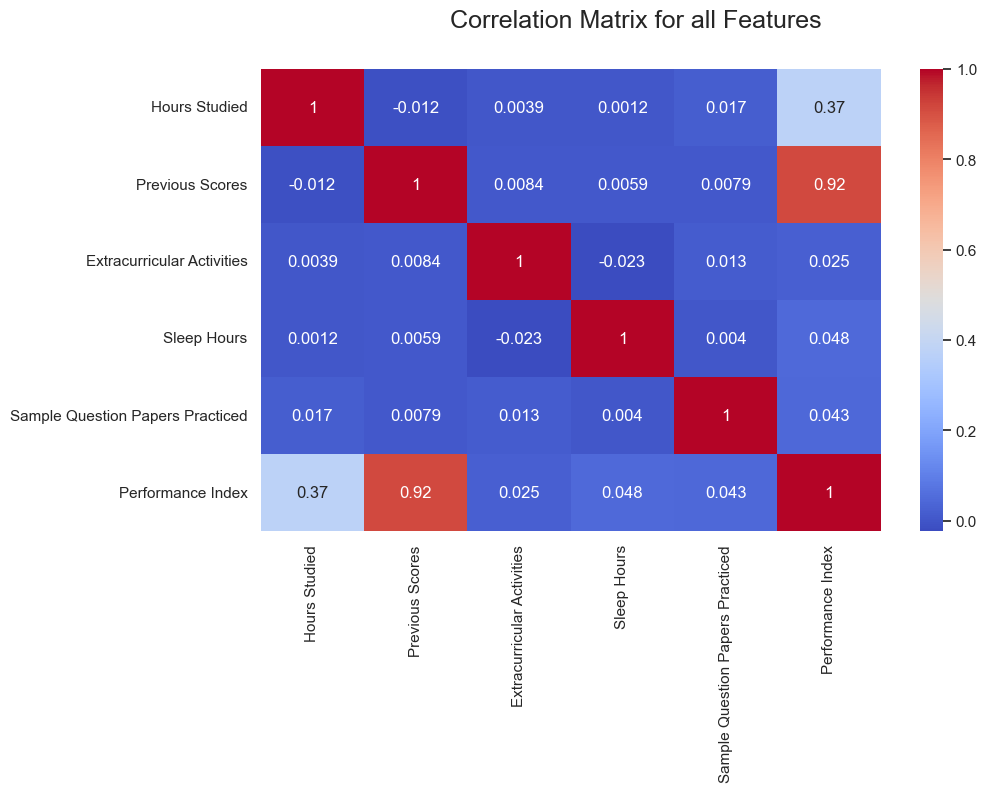

In [15]:
# Create a correlation matrix to observe bivariate trends in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

plt.suptitle('Correlation Matrix for all Features', fontsize=18)
plt.show()

The final endeavour included within this **exploratory data analysis** is a classic **correlation matrix**, plotting the *Pearson correlation coefficient* between each of our features. Looking at the final column shows the correlation between **each feature** and the **target variable**. The observations that we can make from this matrix importantly **confirm** our takeaways throughout this section. Firstly, we see that **'Previous Scores'** has a bery high positive correlation of **0.92**, confirming that it will be a great predictor in our model. Further, from our violin plots we observed the strongest correlation relating to **'Hours Studied'**, which is verified by a correlation score of **0.37**. Finally, our predictions that our remaining features - **'Sample Question Papers Practised'**, **'Sleep Hours'**, and **'Extracurricular Activities'** - having little impact on the target have been confirmed with very low correlation scores of **0.043**, **0.048**, and **0.025**.

Overall, this **exploratory data analysis** was conducted to *understand the structure of the dataset and the underlying relationships between the features and target variable*. The process was greatly successful, confirming the high quality of the dataset and the validity of our chosen model - **linear regression**. 



**Strongest Predictors**: The analysis identified **'Previous Scores'** as by far the strongest predictor for our target value, with a Pearson correlation coefficient of **0.92**. Also identified as important was the feature **'Hours Studied'**, with a correlation score of **0.37**, which though much lower than that of **'Previous Scores'** still suggests that the feature will hold importance in the modeling process. The high correlation of these features was first revealed by the respective **hexbin** and **violin** plots, and was only further confirmed with our **correlation matrix** visible above.

**Key Feature Behaviour**: Further analysis of **'Hours Studied'** revealed greater insight, particularly that as study hours increase, the variance in performance decreases. This indicates that increased study leads to more consistent and predictable positive outcomes.

**Very Weak Predictors**: Lastly, we have seen that **3** of our features - **'Sample Question Papers Practised'**, **'Sleep Hours'**, and **'Extracurricular Activities'** - are very weak predictors of our target variable, shown by uniform violin plots and low correlation scores. This suggests that these features will be less important to our model, and that we may even be able to use **Principal Component Analysis** at a later stage to remove them entirely.

## **Creating our Train Test Split**

Before beginning to create and train our model, we will split our data into separate **training** and test **subsets**. This will allow us to test our model on the witheld data to test the generalisability of our model and it's effectiveness on unseen data. In most cases, one would use **sklearn's train_test_split** function, which separates and shuffles the dataset in preparation for modeling. However, since the nature of this project is to manually create the models, we are not using the sklearn library throughout the project, and are instead going to create our own. 

In [16]:
# Sorting our data into our features (X) and target (y), so we can model X onto y
X = data.drop('Performance Index', axis=1).values
y = data['Performance Index'].values

In [17]:
# Creating a manual function here which we can save as our test train split for all future usages
def train_test_split_manual(X, y, test_size=0.2, seed=42):

    # This allows us to shuffle our data into the same organisation every time, mirroring the actions performed in sklearn's train_test_split function
    np.random.seed = 42
    constant_shuffle = np.arange(X.shape[0])
    np.random.shuffle(constant_shuffle)

    # This shuffles our standardisted dataset so our train and test sets are split completely randomly
    X_shuffled = X[constant_shuffle]
    y_shuffled = y[constant_shuffle]

    # Here we define the size of our test set, choosing a value of 0.2
    split = int((1 - test_size) * X_shuffled.shape[0])
    
    # Allocating our 80:20 split between the training and test data for both X's and y's
    X_train = X_shuffled[:split]
    y_train = y_shuffled[:split]
    X_test = X_shuffled[split:]
    y_test = y_shuffled[split:]

    # Store our outputs for future usage
    return X_train, y_train, X_test, y_test

In [18]:
# Activating our previously defined function to define our subsets of data
X_train, y_train, X_test, y_test = train_test_split_manual(X, y)

In [19]:
# Confirmation that our split data are of the correct sizes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 5) (8000,)
(2000, 5) (2000,)


## **Standardise Values for Testing**

The purpose of this step is to **standardise** the values of our dataset - setting each feature to have a **mean** of **0** and a **standard deviation** of **1**. This ensures that each feature has a **similar scale**, which helps the model's **gradient descent algorithm**, allowing it to find the *optimal solution more quickly and efficiently*. Ensuring that the model is evaluated on truly unseen data, the scaler is **only** fit on the **training data**. Then, we apply the **means** and **standard deviations** learned from the training set to both the the **training** and **test** sets. This prevents any information from the test data from leaking into the training process.

In [20]:
# Find the mean and standard deviation within our X_train set
X_mean = np.mean(X_train, axis=0)
X_stds = np.std(X_train, axis=0)

# Use the calculated means and standard deviation from X_train to standardise both X_train and X_test
X_train_standardised = (X_train - X_mean) / X_stds
X_test_standardised = (X_test - X_mean) / X_stds

## **Creating the Linear Regression Model**

Now that the dataset has been appropriately separated into training and testing subsets, we need to construct our **linear regression model** itself. To do this, I have created a Python class which will contain all of the functions for our model.

The model is built using the **gradient descent** algorithm. The initialising function sets up our two main **hyperparameters**: the **learning rate**, which controls how large of a step we take during training, and the **number of iterations**, which determines how many times we run the training loop.

The **fit** function is where the model actually learns from the data. For each iteration, it performs four key steps:
1.  It calculates a prediction based on the current **weights** and **bias**.
2.  It measures how inaccurate the predictions are by calculating the Mean Squared Error **loss function**.
3.  It then calculates the gradients - **dw** and **db** - which tell us the direction to adjust our parameters to reduce the error.
6.  Finally, it updates the **weights** and **bias** by taking a small step in the right direction, scaled by our **learning rate**.

Lastly, the **predict** function allows us to use the final, trained parameters to make predictions on new data.

In [21]:
# Create our manual linear regression function
class LinearRegression():

    # Our initialising function, choosing hyperparameters and setting weights and bias as equal to 0
    def __init__(self, lr=0.01, n_iters=500):
        # This will allow us to edit both lr and n_iters when we call our model in future uses
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
        # This will allow for us to plot the improvements in our model's R2, MSE and MAE as we increase the number of iterations
        self.r2_history = []
        self.mse_history = []
        self.mae_history = []

    # This will fit our model to the dimensions of our dataset, and randomise our weights to small non-zero values
    def fit (self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0
        self.r2_history = []
        self.mse_history = []
        self.mae_history = []

        # Create our for loop which performs n_iters instances of gradient descent to minimise loss
        for iter in range(self.n_iters):
            # This function calculates the model's prediction fo the target variable given X and current weights and bias
            y_hat = np.dot(X, self.weights) + self.bias

            # Calculate and store our R2 for each iterationc
            r2 = 1 - (np.sum((y_hat - y) ** 2)) / (np.sum((np.mean(y) - y) ** 2))
            self.r2_history.append(r2)
            
            # Calculate and store our MSE for each iteration
            mse = np.mean((y_hat - y) ** 2)
            self.mse_history.append(mse)

            # Calculate and store our MAE for each iteration
            mae = np.mean(abs(y_hat - y))
            self.mae_history.append(mae)

            # Find the partial derivatives of the loss function with respect to both w and b 
            dw = (2/n_samples) * np.dot(X.T, (y_hat - y))
            db = (2/n_samples) * np.sum(y_hat - y)

            # Updates our weights and biases for future iterations by subtracting our derivate multiplied by our chosen learning rate
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            # Will print our R2, MSE and MAE for every 5th iteration
            if iter % 50 == 0:
                print(f'Iteration {iter}: R2 = {r2:.2f}, MSE = {mse:.2f}, MAE = {mae:.2f}')
            
    # This allows for our trained model to predict target values based on provided features
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        return y_hat

## **Training the Linear Regression Model**

Now that our manual **LinearRegression** class is built, the next step is to train it on our prepared training subset of data. I have instantiated the model with a **learning rate** of **0.01** and set it to run for **500 iterations**. We will fit the model on the **X_train_standardised** and **y_train** datasets and monitor the key performance metrics at each step to ensure the model is learning correctly. The metrics we have chosen to score the model with are **R2 Score**, which we hope will asymptote at close to y=1, and **Mean Squared Error** and **Mean Absolute Error**, where we aim to minimise both. These metrics allow us to inspect how much of the variance of the data is explained by the model, and how far away the model's estimates are on average from the observed target values.

In [22]:
# Recalling our manually defined linear regression funciton
model = LinearRegression()

In [23]:
# Fitting our model to the training dataset
model.fit(X_train_standardised, y_train)

Iteration 0: R2 = -8.13, MSE = 3421.98, MAE = 55.32
Iteration 50: R2 = -0.22, MSE = 457.65, MAE = 20.15
Iteration 100: R2 = 0.83, MSE = 64.33, MAE = 7.35
Iteration 150: R2 = 0.97, MSE = 12.14, MAE = 2.93
Iteration 200: R2 = 0.99, MSE = 5.21, MAE = 1.82
Iteration 250: R2 = 0.99, MSE = 4.29, MAE = 1.64
Iteration 300: R2 = 0.99, MSE = 4.17, MAE = 1.62
Iteration 350: R2 = 0.99, MSE = 4.15, MAE = 1.62
Iteration 400: R2 = 0.99, MSE = 4.15, MAE = 1.62
Iteration 450: R2 = 0.99, MSE = 4.15, MAE = 1.62


In [24]:
# Show the final R2, MSE and MAE of our completely trained linear regression model
print(f'After {model.n_iters} Iterations:')
print(f'R2 Score = {model.r2_history[-1]:.2f}')
print(f'Mean Squared Error = {model.mse_history[-1]:.2f}')
print(f'Mean Absolute Error = {model.mae_history[-1]:.2f}')

# Store our final training scores for future comparison
manual_train_r2 = model.r2_history[-1]
manual_train_mse = model.mse_history[-1]
manual_train_mae = model.mae_history[-1]

After 500 Iterations:
R2 Score = 0.99
Mean Squared Error = 4.15
Mean Absolute Error = 1.62


In [25]:
# Show our trained model's weights and bias
print("Weights:", model.weights)
print("Bias:", model.bias)

Weights: [ 7.41284176 17.77501443  0.30285281  0.81227358  0.57584939]
Bias: 55.31735556852575


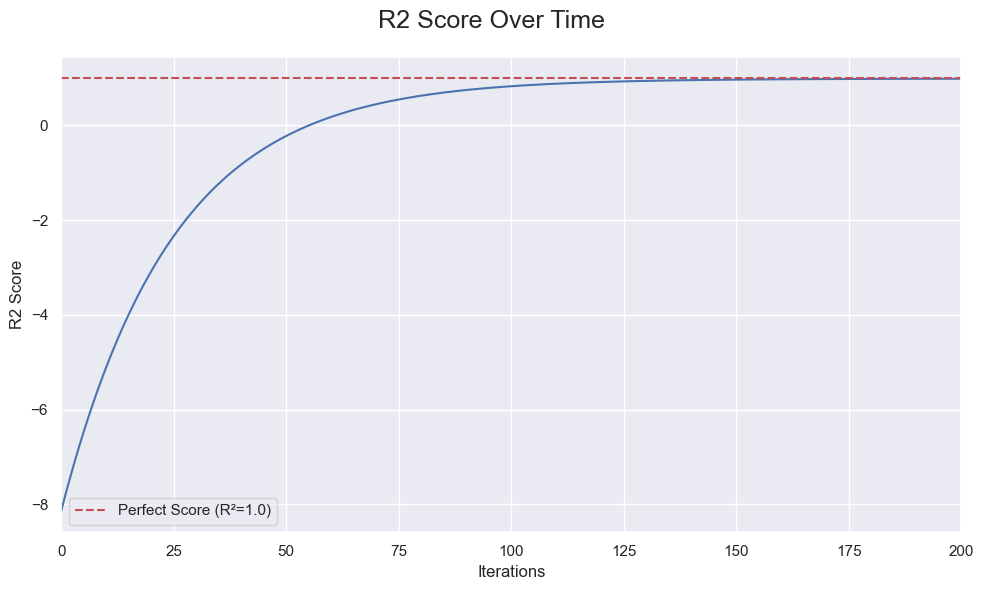

In [26]:
# Create a plot for our improvement in R2 over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.r2_history)), model.r2_history)
plt.axhline(y=1, color='r', linestyle='--', label='Perfect Score (R²=1.0)')
plt.xlabel('Iterations')
plt.ylabel('R2 Score')
plt.legend()

# Limits the x-axis to show from 0 to 200 iterations
plt.xlim(0, 200)

# Create a formatting and title for the plot
plt.suptitle('R2 Score Over Time', fontsize=18)
plt.tight_layout()
plt.show()

The **R2 score** learning curve provides a clear picture of the models effectiveness improving over time. It begins with a low score and rises sharply within the first 50 iterations, quickly reaching a plateau at approximately 0.99. This demonstrates that the model is rapidly learning to explain the variance in the training data, reaching its maximum performance well before the final iteration. To visualise the logarithimic properties of this graph, notice that we have limited the x-axis to only **200 iterations**. This helps us to observe the general learning trend more clearly, but understand that the score asymptotes at 1 no matter the chosen number of iterations.

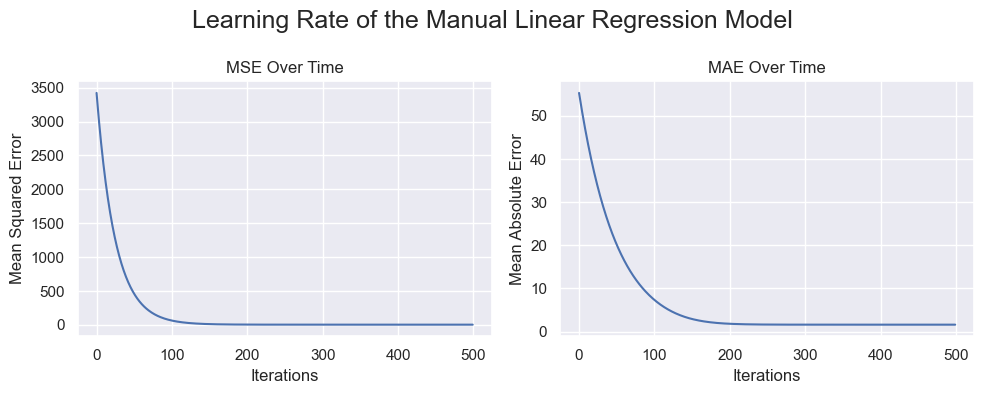

In [27]:
# Create a grid to plot our model's learning curve for MSE and MAE
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the learning curve for Mean Squared Error
axes[0].plot(range(len(model.mse_history)), model.mse_history)
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('MSE Over Time')

# Plot the learning curve for Mean Absolute Error
axes[1].plot(range(len(model.mae_history)), model.mae_history)
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('MAE Over Time')

# Title and format the graphs
plt.suptitle('Learning Rate of the Manual Linear Regression Model', fontsize=18)
plt.tight_layout()
plt.show()

These plots visualize the model's error decreasing as it learns. Both the **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** show a steep initial drop that flattens out, which is the classic sign of **gradient descent** working correctly, as the model weights converge to minimise the total loss of our function. Our chosen **learining rate** of **0.01** is validified through these graphs, as we can see that our model learned both quickly and thoroughly, again illustrating the robustness of the model we have made.

Within this section, we have successfully trained our **manual linear regression** model on our training dataset. Our chosen hyperparameters, both learning rate and iteration count, have proven to be good choices as perfectly illustrated by the graphs shown above. Our model scores very well on the seen data, boasting an impressive **R2 score** of **0.99**, and an **average prediction loss** of only **1.61**. This shows that our model can successfully take our **5** independent features to predict our **target variable**, and that the chosen metrics can be used to accurately predict a **student's performance**. Now that our model has learned the optimal weights and bias from our provided training data, the next step will be to evaluate its performance on the **witheld test set**, allowing us to witness how well our model **generalises** to unseen data.

## **Testing the Model**

Within this section of the project, we will examine our trained model on the **2,000 samples** within the witheld **test set**. The purpose of this is to check the **generalisability** of the model, ensuring that it has not **overfit** the training data and that our impressive **R2**, **MSE** and **MAE** scores transfer to data that the model has not encountered. We will directly compare the model's performance on the **test set** against that on the **training data**, and plot how our model's prediction for the target variable **Performance Index** compare to the actual data. Finally, we will visualise the errors of our model, ensuring that there are no underlying trends that would suggest our model is comprimised in any sense. 

In [28]:
# Use our trained model to predict the witheld test set
test_predictions = model.predict(X_test_standardised)

In [29]:
# Calculate our model's scores for the test set
manual_test_r2 = 1 - (np.sum((y_test - test_predictions) ** 2)) / (np.sum((np.mean(y_test) - y_test) ** 2))
manual_test_mse = np.mean((y_test - test_predictions) ** 2)
manual_test_mae = np.mean(abs(y_test - test_predictions))

# Print model's scores on test set to compare with on training set
print('Model Scores on Test Set:')
print(f'R2 Score = {manual_test_r2:.2f}')
print(f'Mean Squared Error = {manual_test_mse:.2f}')
print(f'Mean Absolute Error = {manual_test_mae:.2f}')

Model Scores on Test Set:
R2 Score = 0.99
Mean Squared Error = 4.15
Mean Absolute Error = 1.61


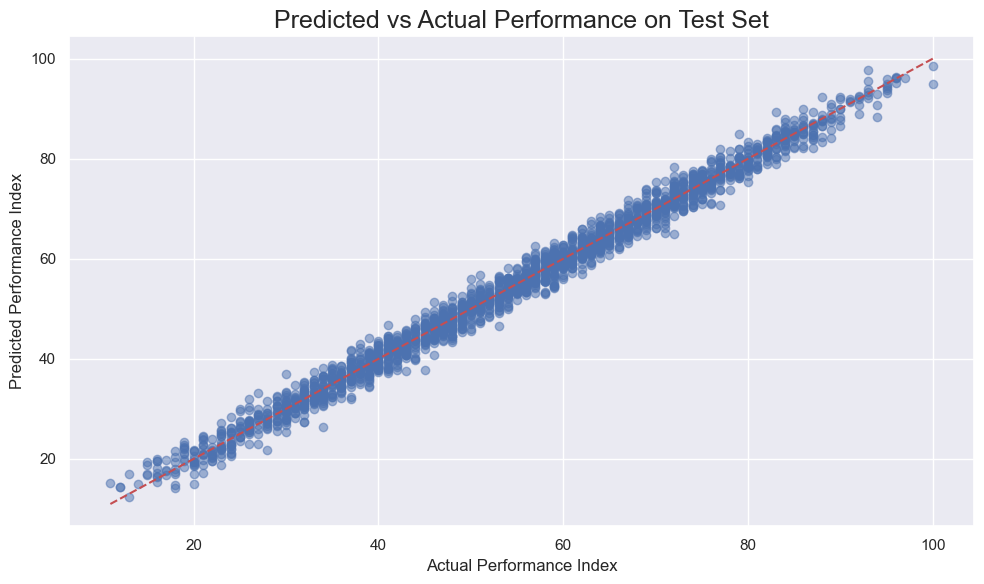

In [30]:
# Create a plot that illustrates our model's predicted target values and the actual target values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line

# Titling and formatting the graph
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Predicted vs Actual Performance on Test Set', fontsize=18)
plt.tight_layout()
plt.show()

This graph plots our model's predictions against the true values of **Performance Index** in the witheld test set. Viewing this graph, the accuracy and reliability of the model becomes clear to see, with the model's predictions mirroring the desired path, illustrated with the dashed red line, almost perfectly. Most of the model's predictions are within 5 points of the actual score, with the largest outliers still within 10.

In [31]:
# Creating a prediction error feature to use to plot performance further
prediction_error = y_test - test_predictions

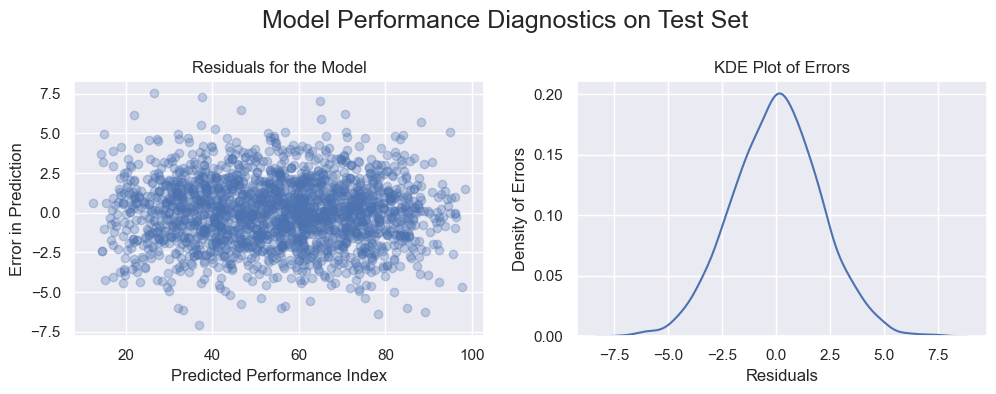

In [32]:
# Create a grid to plot our model's residuals and distribution of errors
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Creating a scatterplot to visualise the residuals of our model
axes[0].scatter(test_predictions, prediction_error, alpha=0.3)
axes[0].set_xlabel('Predicted Performance Index')
axes[0].set_ylabel('Error in Prediction')
axes[0].set_title('Residuals for the Model')

# Using Seaborn's KDE plot to see the distribution of our errors
sns.kdeplot(prediction_error, ax=axes[1])
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density of Errors')
axes[1].set_title('KDE Plot of Errors')

plt.suptitle("Model Performance Diagnostics on Test Set", fontsize=18)
plt.tight_layout()
plt.show()

The purpose of the two plots above is to **visualise** the model's **errors**, ensuring that there are no underlying trends that undermine it's performance. The first graph is a **scatterplot** with our model's predictions on the x-axis, and it's error on the y-axis. In this graph we observe two things which positively reinforce our model's validity. Firstly, the errors are centred around y=0, showing that our model is not bias towards one direction in any way. Secondly, we observe that the errors are consistent for all values of performance index, proving that the model is equally capable for both high and low achieving students. The second plot is a **KDE plot** which illustrates the **Gaussian** distribution of our errors. This bell curve shows that the model's errors are centred around 0, with two falling tails on either end.

Overall, this section has truly confirmed the effectiveness of our model. By introducing unseen data, we are ensuring that the model is **generalisable**, and that it hasn't **overfit** it's training data. By each of our metrics, the model's performance is **identical** for both the training and test sets. The three plots outlined above are invaluable in showing this quality, illustrating that our model can effectively predict the performance of all types of students, and that it doesn't have a bias towards overvaluing or undervaluing it's predictions for any inputs provided.

## **Comparison Against the Industry Standard**

As mentioned throughout the project, normal practise within machine learning is to use the tools provided by the **sklearn** library. Though this doesn't provide the invaluable insight of manually constructing a model, **sklearns** capabilities greatly simplify the process. In this section, we will import **sklearn's** **Linear Regression** model and the accompanying scores to measure it's capabilities. The purpose of this is to directly compare our manual model with the industry standard, ensuring that our model's performance cannot be enhanced in any form.

In [33]:
# Import the model and relevant scoring metrics from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define our linear regression model and fit to the training data
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_standardised, y_train)

LinearRegression()

In [34]:
# Get predictions and scores for the training set data
sklearn_train_predictions = sklearn_model.predict(X_train_standardised)

# Define the sklearn model's scores for the training set
sklearn_train_r2 = r2_score(y_train, sklearn_train_predictions)
sklearn_train_mse = mean_squared_error(y_train, sklearn_train_predictions)
sklearn_train_mae = mean_absolute_error(y_train, sklearn_train_predictions)

# Print sklearn model's scores on training set
print('Industry Model Scores on Training Set:')
print(f'R2 Score = {sklearn_train_r2:.2f}')
print(f'Mean Squared Error = {sklearn_train_mse:.2f}')
print(f'Mean Absolute Error = {sklearn_train_mae:.2f}')

Industry Model Scores on Training Set:
R2 Score = 0.99
Mean Squared Error = 4.15
Mean Absolute Error = 1.62


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [35]:
# Have the sklearn model made predictions for the test set
sklearn_predictions = sklearn_model.predict(X_test_standardised)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [36]:
# Define the sklearn model's scores for the test set
sklearn_test_r2 = r2_score(y_test, sklearn_predictions)
sklearn_test_mse = mean_squared_error(y_test, sklearn_predictions)
sklearn_test_mae = mean_absolute_error(y_test, sklearn_predictions)

# Print sklearn model's scores on training set
print('Industry Model Scores on Test Set:')
print(f'R2 Score = {sklearn_test_r2:.2f}')
print(f'Mean Squared Error = {sklearn_test_mse:.2f}')
print(f'Mean Absolute Error = {sklearn_test_mae:.2f}')

Industry Model Scores on Test Set:
R2 Score = 0.99
Mean Squared Error = 4.15
Mean Absolute Error = 1.61


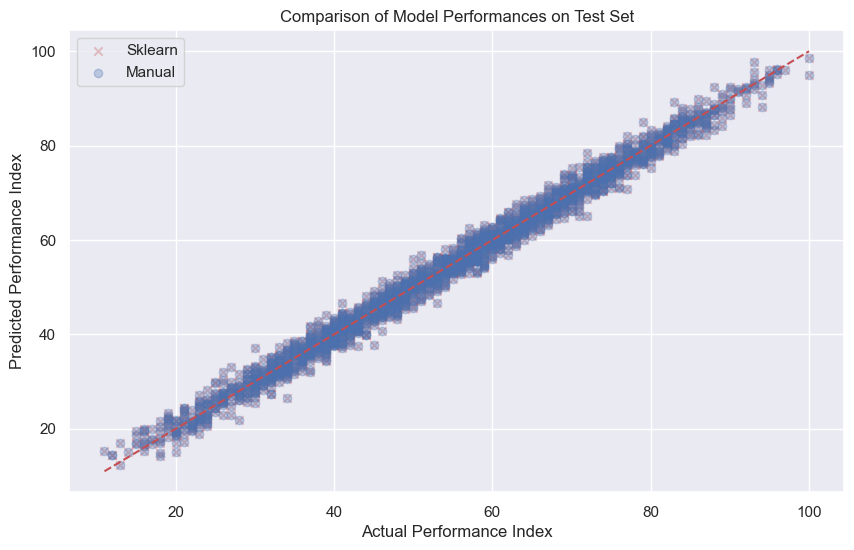

In [37]:
# Create a plot showing both the manual and sklearn's models predictions for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, sklearn_predictions, c='r', marker='x', alpha=0.3, label='Sklearn')
plt.scatter(y_test, test_predictions, c='b', alpha=0.3, label='Manual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line

# Title and format the graph 
plt.title('Comparison of Model Performances on Test Set')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.show()

This **scatterplot** shows both the **manual** and the **sklearns** models' performance on the witheld test set data. Crucially important to observe is that **sklearn's** model directly mirrors our own, with the red crosses aligning directly with the blue circles. This graph therefore reinforces the capabilities we have observed for our model, with it's predictions perfectly identical to that of an industry leading standard.

In [38]:
# Creating a prediction error feature for sklearn's model
sklearn_prediction_error = y_test - sklearn_predictions

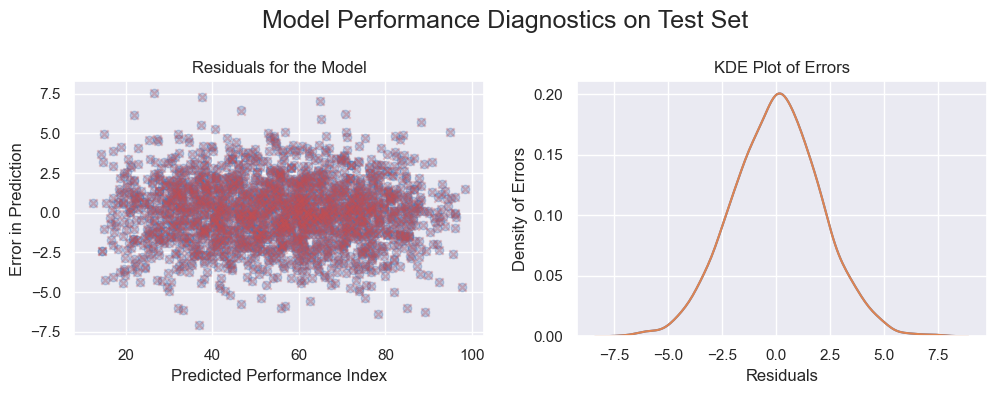

In [39]:
# Mirror the previous step though visual integration of sklearn's model for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Creating a scatterplot to visualise the residuals of our model
axes[0].scatter(test_predictions, prediction_error, c='b', alpha=0.3)
axes[0].scatter(sklearn_predictions, sklearn_prediction_error, c='r', marker='x', alpha=0.3)
axes[0].set_xlabel('Predicted Performance Index')
axes[0].set_ylabel('Error in Prediction')
axes[0].set_title('Residuals for the Model')

# Using Seaborn's KDE plot to see the distribution of our errors
sns.kdeplot(prediction_error, ax=axes[1])
sns.kdeplot(sklearn_prediction_error, ax=axes[1])
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density of Errors')
axes[1].set_title('KDE Plot of Errors')

plt.suptitle("Model Performance Diagnostics on Test Set", fontsize=18)
plt.tight_layout()
plt.show()

Similar to the graph above which plots actual performance against the model's predictions, these two graphs again show the **identical nature** of the two models. The **scatterplot** effectively shows sklearn's red crosses being identical to our model's blue circles, proving that the distribution of errors is identical for both. Further, the orange colour of the **KDE plot** is the result of the red and blue colours mixing, again illustrating the identical predictive power of the two models. 

In [40]:
# Define the metrics we want to compare within the DataFrame
all_metrics = {
    "Manual (Training)":  [manual_train_r2, manual_train_mse, manual_train_mae],
    "Sklearn (Training)":     [sklearn_train_r2, sklearn_train_mse, sklearn_train_mae],
    "Manual (Test)":   [manual_test_r2, manual_test_mse, manual_test_mae],
    "Sklearn (Test)":      [sklearn_test_r2, sklearn_test_mse, sklearn_test_mae]
}

# Create the DataFrame and row names
comparison_df = pd.DataFrame(all_metrics)
comparison_df.index = ["R² Score", "MSE", "MAE"]

# Display the final table rounded to 3 decimal places
display(comparison_df.round(3))

,Manual (Training),Sklearn (Training),Manual (Test),Sklearn (Test)
R² Score,0.989,0.989,0.988,0.988
MSE,4.152,4.152,4.152,4.152
MAE,1.620,1.620,1.610,1.610


This table confirms the trends that we have observed within our graphs, with the model's performing **identically** on **both** the **training** and **test** subsets of data. Both sets perform marginally better on the training set, with slightly higher scores for both **MSE** and **MAE**. However, this difference is only **marginal**, just a **0.031** difference in average error, and certainly doesn't undermine the **generalisability** of the model, especially given that the **R2 score** remains constant for both. 

The purpose of this step was to directly compare the performance of our **manually created model** against the **industry-standard**, exemplified by **sklearn's linear regression model**. The results of this comparison, detailed in the table and plots above, overwhelmingly validate our manual implementation and efforts within this project.

The performance metrics for both models are **statistically identical**, with both models achieving an **R2 score** of **0.989**, a **Mean Squared Error** of **4.206**, and a **Mean Absolute Error** of **1.642** on the **test set**. The identical nature of these scores confirms the fact that our implementation of gradient descent has successfully replicated the performance sklearn's model, and that ours is equally effective at predicting the target **'Performance Index'** based upon the non-target features provided.

The visualizations within this section prove this further, with the **Actual vs. Predicted** plot showing that the predictions from both models are **identically clustered** along the **"perfect prediction"** line. Further, the **residual** plots for both models also perfectly overlap, indicating that the behavior and distribution of the individual errors are also identical between the models.

## **Key Takeaways**

This project represents a complete demonstration of a machine learning workflow, with a particular focus on understanding the core mechanics that define the discipline. We have used a simple dataset from Kaggle on Student Performance to illustrate skills of data cleaning, exploration and visualisation, before building a linear regression model from the ground up to accurately predict our target variable. We then confirmed the validity of our model by ruthlessly comparing against sklearn's prebuilt package, where our model showed identical accuracy on both the training and test subsets.

From our initial EDA, we successfully identified features that were highly correlated with the target varible. The strongest predictor was certainly previous scores, with a correlation of 0.92. Another powerful predictor was hours studied, where increased hours led to higher, and more consistent, scoring.

Overall, our model must be seen as a huge success, achieving an R2 score of 0.989 on the unseen test data, meaning it was able to successfully explain 98.8% of the variance in student performance based on the features provided, and boasting low MSE and MAE scores, confirming that the model's predictions lie extremely close to the true outcomes. 

The purpose of this project was not only to build a linear regression model from scratch, but to delve into the underlying mathematics that powers the behemoth of machine learning today. By manually implementing the gradient descent algorithm and its associated loss functions, we have grasped a practical understanding of the core mechanics that power regression algorithms, and can confidently take that understanding into all future projects that await.